In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd
from math import sqrt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


In [2]:
# load the dataset
x = pd.read_csv('data_cleaned_avg.csv')
# split into input (X) and output (y) variables
y = x.pop('O3')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

W0419 21:11:52.427125 15048 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0419 21:11:52.458029 15048 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0419 21:11:52.461021 15048 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0419 21:11:52.538812 15048 deprecation_wrapper.py:119] From C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.comp

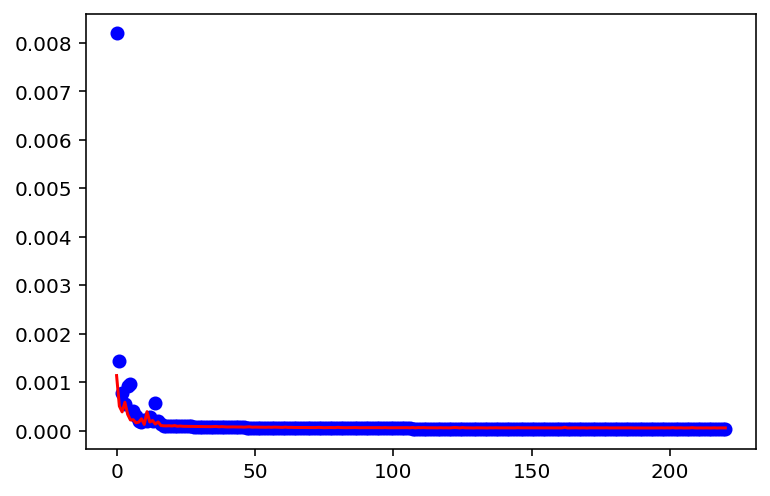

In [5]:
model = Sequential()
model.add(Dense(50, input_shape=(31,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer="adam", loss='mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2,shuffle = True, verbose = 0, callbacks=[earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [8]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
rms_train = sqrt(mean_squared_error(y_train, y_train_pred))
y_test_pred = model.predict(X_test)
rms_test = sqrt(mean_squared_error(y_test, y_test_pred))

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("RMS: ",rms_train)
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))
print("RMS: ",rms_test)

The R2 score on the Train set is:	0.733
RMS:  0.006245869898385627
The R2 score on the Test set is:	0.523
RMS:  0.008295177151102156


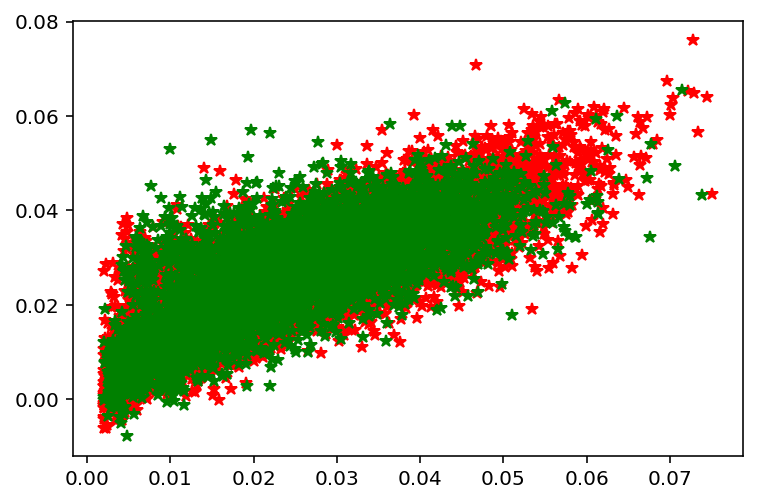

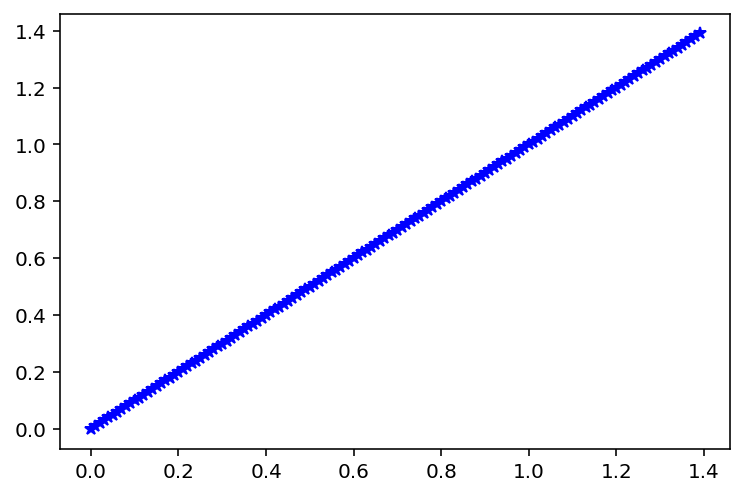

In [9]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,140):
    plt.plot(i/100,i/100,'*b')